System: K5 0.3 run4
voxel size is: (0.5, 0.5, 0.5)
Number of vertices: 31122
Number of faces: 61462
Surface Area: 6767.204716658423 nm²
Projection Area (xy plane): 6197.125 nm²
Patches Area: 4.4 nm²
RMSD: 1.6888355016708374 nm


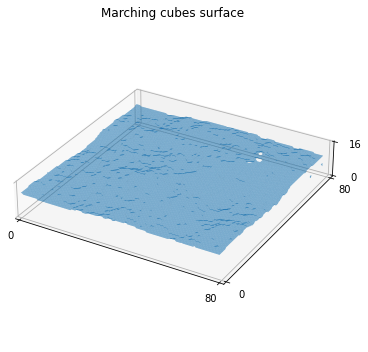

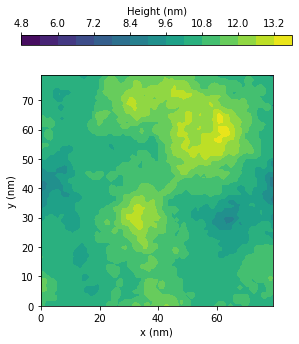

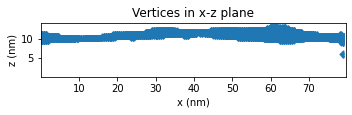

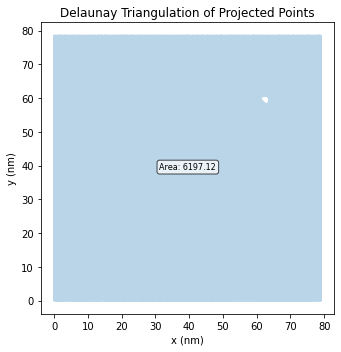

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from GrafTo.analysis.RunningSURF import Surface

def plot_projection_data(pos):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(pos[:,0], pos[:,1], s=0.1)
    ax.set_title("Raw data projection")
    ax.set_xlabel("x(nm)")
    ax.set_ylabel("y(nm)")
    ax.set_aspect('equal')
    
   
############################################################################################################


import os
ROOT = os.getcwd()
NREPS = ["K5"]
DENS = [0.3]
RUNS = ["run4"]
voxel_size = (0.5,0.5,0.5) # Voxel size in nm
level = None   # Find iso-valued contours in a 2D array for a given level value (None for automatic)
sigma = 1.5      # If a number the surface is smoothed with a gaussian filter of that sigma. If False, don't use filter

for NREP in NREPS:
    out = []
    for DEN in DENS:
        for RUN in RUNS:

            print(f"System: {NREP} {DEN} {RUN}")
            print("voxel size is:", voxel_size)

            df = pd.read_csv(f"{ROOT}/positions/positions_{NREP}_{DEN}_{RUN}.csv").dropna()     
            
            mean = df.groupby("id").mean()
            positions = mean[["x","y","z"]].values

            #plot_projection_data(positions)
            Surface = mc.Surface(positions)
            base_area, surface_area, projected_area, verts, faces = Surface.calculate_marching_cubes(voxel_size=voxel_size, level=level, 
                                                                layers_to_ignore=1, out=f"{ROOT}/plots/{NREP}_{DEN}_{RUN}", 
                                                                sigma=sigma, maxlen=1.5)
            RMSD = Surface.calculate_rmsd_from_avg_height(verts)
            substrate_area = np.abs(round(base_area - projected_area, 1))

            out.append([DEN, surface_area, substrate_area, projected_area, RUN, RMSD])

            # Print output
            print(f"Surface Area: {surface_area} nm²")
            print(f"Projection Area (xy plane): {projected_area} nm²")
            print(f"Patches Area: {substrate_area} nm²")
            print(f"RMSD: {RMSD} nm")

    # Save output
    df = pd.DataFrame(np.array(out), columns=["dens","area_PDMS","area_sub","area_proj","run","rmsd"])
    df.to_csv(f"{ROOT}/out_files/surface_area_{NREP}.csv", index=False)